In [26]:
import os
import shutil
import random

import pandas as pd
import matplotlib.pyplot as plt
from skimage import io
from spectral import imshow

%matplotlib inline

In [20]:
BASEPATH = 'data/'
# WORKING = 'data/working'

CSVPATH = os.path.join(BASEPATH, 'test_v2_file_mapping.csv')
JPGPATH = os.path.join(BASEPATH, 'test-jpg')
TIFPATH = os.path.join(BASEPATH, 'test-tif-v2')

FIXEDPATH = os.path.join(BASEPATH, 'fixed')

In [21]:
def copy_and_rename():
    '''Copy up to `num_files` images to the scratch directory.
    `num_files` is needed because you can only write a few hundred
    megabytes in this kernel environment. Use the `df -h` command
    to check.
    
    This is a purposely non-destructive operation. You'll need to
    move the renamed files back to the test-tif-v2 directory so
    that your existing scripts will continue to work.
    '''
    n = 0

    if not os.path.exists(FIXEDPATH):
        os.mkdir(FIXEDPATH)

    for index, row in df.iterrows():
        old = os.path.join(TIFPATH, row['old'])
        new = os.path.join(FIXEDPATH, row['new'])
        shutil.copy(old, new)
        n += 1
        if n % 500 == 0:
            print('Copied {}'.format(n))
#         # Remove the following lines to unleash the full power of
#         # this kernel and copy & rename all the misnamed tif files!
#         if n == num_files:
#             print('Copied {} files as requested'.format(n))
#             break

In [22]:
df = pd.read_csv(CSVPATH)


In [23]:
# copy_and_rename()

In [27]:
def load_img(fname, tifpath, jpgpath):
    # Load the tif and extract the blue, green and red bands
    # (the bands are ordered by wavelength, the way Landsat
    # bands are). Then re-order the arrays so that we can
    # view them in the standard RGB band combination.
    if 'tif' in fname:
        path = os.path.join(tifpath, fname)
        img = io.imread(path)
        bgr = img[:,:,:3]
        rgb = bgr[:, :, [2,1,0]]
        return rgb
    else:
        path = os.path.join(jpgpath, fname)
        img = io.imread(path)
        return img


def show_img(fname, tifpath=TIFPATH, jpgpath=JPGPATH):
    img = load_img(fname, tifpath, jpgpath)

    # use spectral to view tif files
    if 'tif' in fname:
        imshow(img)
    # otherwise use standard matplotlib to view jpgs
    else:
        plt.figure()
        plt.imshow(img)

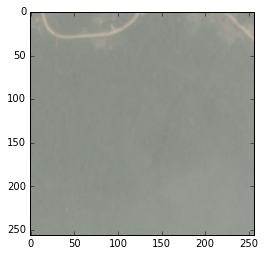

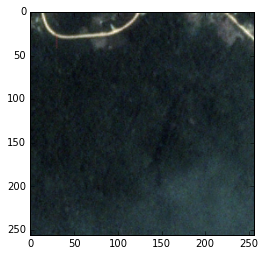

In [31]:
show_img('file_10.jpg')
show_img('file_10.tif',tifpath=FIXEDPATH)